In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from boto3_utilities import *

%matplotlib inline

In [2]:
BUCKET_NAME = "co2-data-keisuke-nakata"

In [3]:
df_mech = read_s3_file(BUCKET_NAME, "dt=2022/01/19/21-50-00.csv")
df_mech = df_mech[:60]
df_mech.head()

,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan
0,2022/01/19 21:50:04,480,25.09,24.12,1008.65,1005,5,0.000000,open,0,on,on,off
1,2022/01/19 21:50:14,480,25.05,24.26,1008.55,1014,5,0.001000,close,0,on,on,off
2,2022/01/19 21:50:24,485,25.02,24.23,1008.56,1022,0,0.000000,close,0,on,on,off
3,2022/01/19 21:50:34,485,25.00,24.27,1008.59,1027,0,0.000000,close,0,on,on,off
4,2022/01/19 21:50:44,479,24.97,24.29,1008.59,1031,0,0.000000,close,0,on,on,off
5,2022/01/19 21:50:54,479,24.95,24.32,1008.59,1029,0,0.000000,close,0,on,on,off
6,2022/01/19 21:51:04,489,24.94,24.32,1008.65,1032,0,0.000000,close,0,on,on,off
7,2022/01/19 21:51:14,489,24.92,24.31,1008.63,1041,0,0.000000,close,0,on,on,off
8,2022/01/19 21:51:24,488,24.89,24.33,1008.63,1033,0,0.000000,close,0,on,on,off
9,2022/01/19 21:51:33,488,24.88,24.37,1008.61,1029,2,0.000000,close,0,on,on,off


In [4]:
df_door = read_s3_file(BUCKET_NAME, "dt=2022/01/19/21-50-00.csv")
df_door = df_door[75:75+60]
df_door.head()

,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan
75,2022/01/19 22:02:29,487,25.11,22.73,1008.54,1111,2,0.019000,open,0,on,on,off
76,2022/01/19 22:02:39,486,25.07,22.95,1008.46,1099,2,0.001000,open,0,on,on,off
77,2022/01/19 22:02:49,486,25.07,23.07,1008.47,1089,0,0.005000,open,0,on,on,off
78,2022/01/19 22:02:59,487,25.03,22.68,1008.55,1082,0,0.004444,open,0,on,on,off
79,2022/01/19 22:03:09,487,24.96,22.75,1008.47,1069,0,0.003000,open,0,on,on,off


In [5]:
df_33 = read_s3_file(BUCKET_NAME, "dt=2022/01/20/00-31-57.csv")
df_33 = df_33[10:10+60]
df_33.head()

,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan
10,2022/01/20 00:33:41,491,25.50,20.78,1007.64,1086,0,0.667000,close,1,on,on,off
11,2022/01/20 00:33:51,491,25.48,20.49,1007.71,1067,0,0.641111,close,1,on,on,off
12,2022/01/20 00:34:01,487,25.43,20.35,1007.63,1053,0,0.742000,close,1,on,on,off
13,2022/01/20 00:34:11,487,25.41,20.34,1007.63,1021,0,0.949000,close,1,on,on,off
14,2022/01/20 00:34:21,486,25.38,20.28,1007.61,997,0,0.663000,close,1,on,on,off


In [6]:
df_66 = read_s3_file(BUCKET_NAME, "dt=2022/01/19/22-39-35.csv")
df_66 = df_66[20:20+60]
df_66.head()

,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan
20,2022/01/19 22:42:55,489,25.00,21.36,1008.45,1119,0,0.959,close,2,on,on,off
21,2022/01/19 22:43:05,486,24.97,21.36,1008.44,1117,0,0.872,close,2,on,on,off
22,2022/01/19 22:43:15,486,24.93,21.11,1008.43,1113,2,0.877,close,2,on,on,off
23,2022/01/19 22:43:25,489,24.86,21.23,1008.42,1043,4,0.847,close,2,on,on,off
24,2022/01/19 22:43:35,489,24.78,21.21,1008.40,976,6,0.796,close,2,on,on,off


In [7]:
df_100 = read_s3_file(BUCKET_NAME, "dt=2022/01/19/23-28-39.csv")
df_100 = df_100[:60]
df_100.head()

,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan
0,2022/01/19 23:28:47,485,25.13,21.23,1008.14,1039,6,0.725,open,3,on,on,off
1,2022/01/19 23:28:56,485,24.93,20.13,1008.09,1033,0,0.701,close,3,on,on,off
2,2022/01/19 23:29:06,484,24.81,20.38,1008.11,1016,4,0.705,close,3,on,on,off
3,2022/01/19 23:29:16,484,24.82,21.40,1008.13,1002,0,0.883,close,3,on,on,off
4,2022/01/19 23:29:26,486,24.79,21.88,1008.09,983,0,0.914,close,3,on,on,off


In [8]:
df_door_100 = read_s3_file(BUCKET_NAME, "dt=2022/01/20/02-35-41.csv")
df_door_100 = df_door_100[:60]
df_door_100.head()

,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan
0,2022/01/20 02:35:47,489,25.85,19.58,1007.05,982,4,0.046,open,0,on,on,off
1,2022/01/20 02:35:57,484,25.78,19.42,1007.06,976,6,0.983,close,0,on,on,off
2,2022/01/20 02:36:07,484,25.52,17.76,1007.01,980,7,1.302,open,0,on,on,off
3,2022/01/20 02:36:17,484,25.30,18.26,1007.00,969,6,1.189,open,0,on,on,off
4,2022/01/20 02:36:27,484,25.04,18.21,1006.95,948,5,0.704,open,0,on,on,off


In [9]:
df_door_100_fan = read_s3_file(BUCKET_NAME, "dt=2022/01/20/01-47-33.csv")
df_door_100_fan = df_door_100_fan[:60]
df_door_100_fan.head()

,dt,color,temp,hum,pressure,co2,pir,mph,door,pos,conditioner,ventilation,fan
0,2022/01/20 01:47:34,480,25.10,21.95,1007.27,1080,6,0.000000,close,0,on,on,off
1,2022/01/20 01:47:44,480,25.16,20.78,1007.16,1088,7,0.298889,open,0,on,on,off
2,2022/01/20 01:47:54,483,25.05,19.36,1007.24,1082,5,1.003000,close,0,on,on,off
3,2022/01/20 01:48:03,483,24.63,19.93,1007.24,1068,7,0.635000,open,2,on,on,off
4,2022/01/20 01:48:13,474,24.50,20.38,1007.24,1054,2,0.660000,open,2,on,on,off


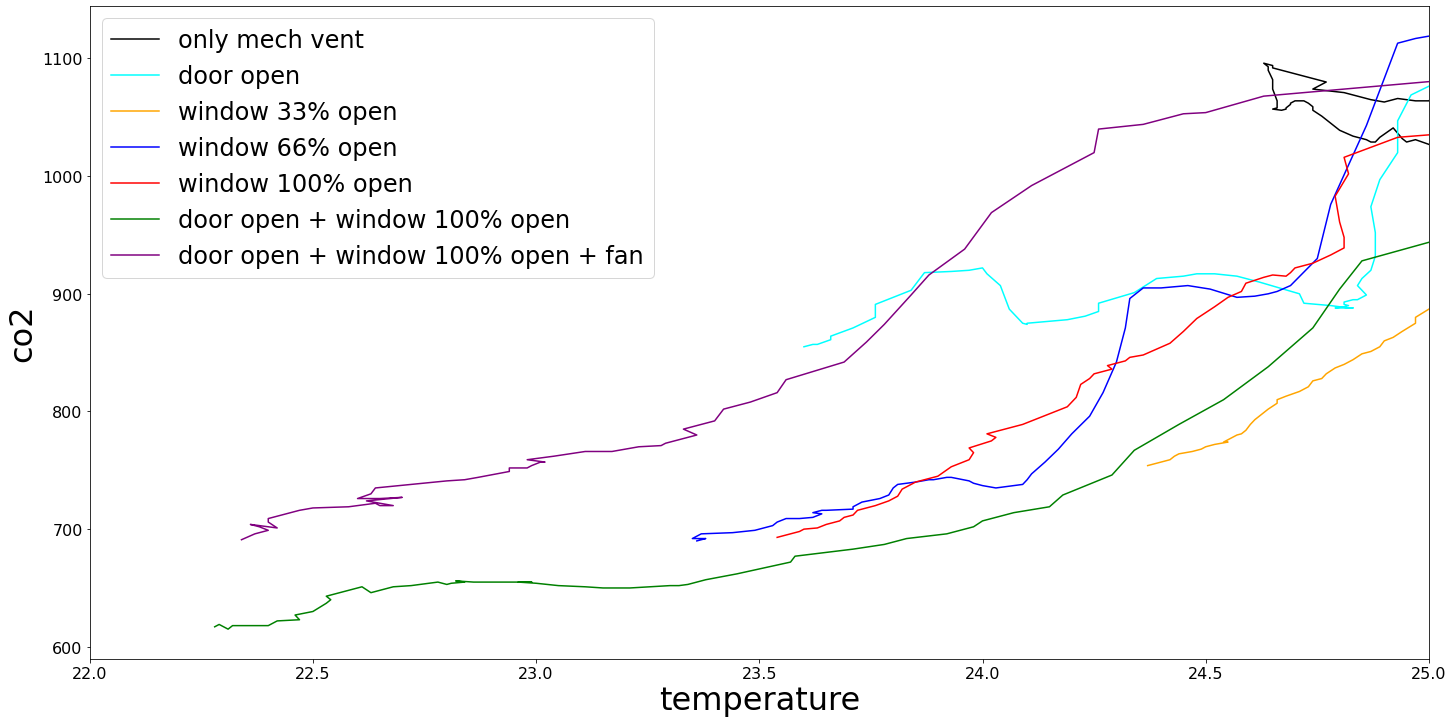

In [10]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(1,1,1)

ax.plot(df_mech['temp'], df_mech['co2'], c='black', label='only mech vent')
ax.plot(df_door['temp'], df_door['co2'], c='cyan', label='door open')
ax.plot(df_33['temp'], df_33['co2'], c='orange', label='window 33% open')
ax.plot(df_66['temp'], df_66['co2'], c='blue', label='window 66% open')
ax.plot(df_100['temp'], df_100['co2'], c='red', label='window 100% open')
ax.plot(df_door_100['temp'], df_door_100['co2'], c='green', label='door open + window 100% open')
ax.plot(df_door_100_fan['temp'], df_door_100_fan['co2'], c='purple', label='door open + window 100% open + fan')

ax.set_xlabel('temperature', fontsize=32)
ax.set_ylabel('co2', fontsize=32)

ax.set_xlim([22.0, 25])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=24)

fig.show()